# CSCI 416 - HW2

### Name: Nicholas Wilson

# <font color='red'>Problem 2</font>


# Implement Logistic Regression for Book Classification

This notebook does the following:

* Loads a data set for predicting whether a book is hardcover or paperback from two input features: the thickness of the book and the weight of the book
* Normalizes the features
* Has a placeholder for your implementation of logistic regression
* Plots the data and the decision boundary of the learned model

Read below and follow instructions to complete the implementation.

## Setup
Run the code below to import modules, etc.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from logistic_regression import logistic, cost_function, gradient_descent

In [2]:
def normalize_features( X, mu=None, sigma=None ):
    '''
    Feature normalization
    
    Inputs:
        X       m x n data matrix (either train or test)
        mu      vector of means (length n)
        sigma   vector of standard deviations (length n)

    Outputs:
        X_norm  normalized data matrix
        mu      vector of means
        sigma   vector of standard deviations

    IMPORTANT NOTE: 
        When called for training data, mu and sigma should be computed 
        from X and returned for later use. When called for test data, 
        the mu and sigma should be passed in to the function and
        *not* computed from X.

    '''
    if mu is None:
        mu    = np.mean(X, axis=0)
        sigma = np.std (X, axis=0)

    # Don't normalize constant features 
    mu   [sigma == 0] = 0
    sigma[sigma == 0] = 1
    X_norm = (X - mu)/sigma

    return (X_norm, mu, sigma)

## Load and Prep Data
*Read the code* in the cell below and run it. This loads the book data from file and selects two features to set up the training data ``X`` (data matrix) and ``y`` (label vector). It then normalizes the training data.

In [3]:
data = pd.read_csv('book-data.csv', sep=',',header=None).values

# % Data columns
# %
# % 0 - width
# % 1 - thickness
# % 2 - height
# % 3 - pages
# % 4 - hardcover
# % 5 - weight

y = data[:,4]

# % Extract the normalized features into named column vectors
width     = data[:,0]
thickness = data[:,1]
height    = data[:,2]
pages     = data[:,3]
weight    = data[:,5]

m = data.shape[0]
X = np.stack([np.ones(m), thickness, height], axis=1)
n = X.shape[1]

X, mu, sigma = normalize_features(X)

# (1 point) Implement the ``logistic`` function
Open the file ``logistic_regression.py`` and complete the code for the function ``logistic``. Then run the cell below to plot the logistic function for $-10 \leq z \leq 10$ to test your implementation --- it should look like the logistic function!

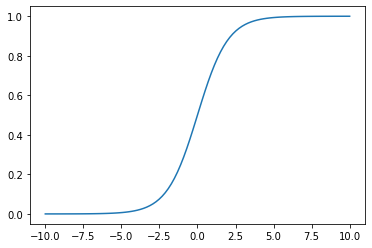

In [4]:
z = np.linspace(-10, 10, 100)
plt.plot(z, logistic(z))
plt.show()

# (2 points) Implement ``cost_function``
Complete the code for ``cost_function`` in the file ``logistic_regression.py`` to implement the logistic regression cost function. Then test it with the code in the cell below.

In [39]:
theta = np.zeros(n)

#tmp = np.transpose(theta)
# print(tmp)
# print(X[2])
# print(np.dot(tmp,X[2]))
# print(logistic(np.dot(tmp,X[2])))
# print(np.log(logistic(np.dot(tmp,X[2]))))
# print(np.log(1-logistic(np.dot(tmp,X[2]))))

# print(y[2])
print(cost_function(X, y, theta)) # prints 38.81624....

38.816242111356935


# Setup for plotting a learned model
Run this cell and optionally read the code. It defines a function to help plot the data together with the decision boundary for the model we are about to learn.

In [40]:
def plot_model(X, y, theta):
    pos = y==1
    neg = y==0

    plt.scatter(X[pos,1], X[pos,2], marker='+', color='blue', label='Hardcover')
    plt.scatter(X[neg,1], X[neg,2], marker='o', color='red', facecolors='none', label='Paperback')

    # plot the decision boundary
    x1_min = np.min(X[:,1]) - 0.5
    x1_max = np.max(X[:,1]) + 0.5

    x1 = np.array([x1_min, x1_max])
    x2 = (theta[0] + theta[1]*x1)/(-theta[2])
    plt.plot(x1, x2, label='Decision boundary')

    plt.xlabel('thickness (normalized)')
    plt.ylabel('height (normalized)')
    plt.legend(loc='lower right')
    plt.show()

# (7 points) Implement gradient descent for logistic regression
Now complete the code for ``gradient_descent`` in the file ``logistic_regression.py``, which runs gradient descent to find the best parameters ``theta``, and write code in the cell below to:

1. Call ``gradient_descent`` to learn ``theta``
1. Print the final value of the cost function
1. Plot J_history to assess convergence
1. Tune the step size and number of iterations if needed until the algorithm converges and the decision boundary (see next cell) looks reasonable
1. Print the accuracy---the percentage of correctly classified examples in the training set

26.27020134026575


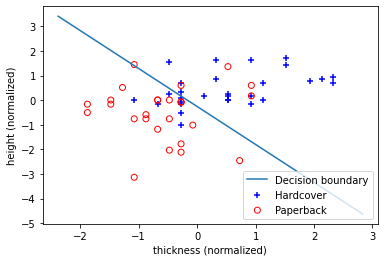

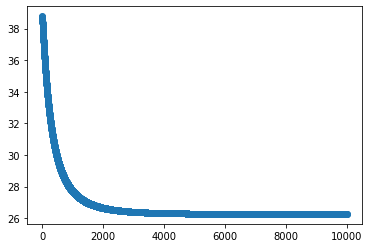

Percentage Correct: 76.78571428571429


In [52]:
theta = np.zeros(n)

#
# YOUR CODE HERE
#
iterations = 10000
alpha = 1e-4
theta, costs = gradient_descent(X,y,theta,alpha,iterations)
print(costs[-1]) #Final costs

# Plots data and decision boundary. If you have learned a good theta
# you will see a decision boundary that separates the data in a 
# reasonable way.
plot_model(X, y, theta) 
plt.show()
plt.plot([i for i in range(iterations)], costs, marker='o', linestyle='none')
plt.show()

my_results = np.dot(X,theta)
accuracy = 0
for i in range(y.size):
  if my_results[i] < 0 and y[i] == 0 or my_results[i] > 0 and y[i] == 1:
    accuracy = accuracy + 1
percentage_correct = (accuracy / y.size) * 100
print("Percentage Correct: " + str(percentage_correct))

# <font color='red'>Problem 3</font>


# Logistic regression for SMS spam classification


Each line of the data file `sms.txt`
contains a label---either "spam" or "ham" (i.e. non-spam)---followed
by a text message. Here are a few examples (line breaks added for readability):

    ham     Ok lar... Joking wif u oni...
    ham     Nah I don't think he goes to usf, he lives around here though
    spam    Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.
            Text FA to 87121 to receive entry question(std txt rate)
            T&C's apply 08452810075over18's
    spam    WINNER!! As a valued network customer you have been
            selected to receivea £900 prize reward! To claim
            call 09061701461. Claim code KL341. Valid 12 hours only.

To create features suitable for logistic regression, code is provided to do the following (using tools from the ``sklearn.feature_extraction.text``):

* Convert words to lowercase.
* Remove punctuation and special characters (but convert the \$ and
  £ symbols to special tokens and keep them, because these are useful for predicting spam).
* Create a dictionary containing the 3000 words that appeared
  most frequently in the entire set of messages.
* Encode each message as a vector $\mathbf{x}^{(i)} \in
  \mathbb{R}^{3000}$. The entry $x^{(i)}_j$ is equal to the
  number of times the $j$th word in the dictionary appears in that
  message.
* Discard some ham messages to have an
  equal number of spam and ham messages.
* Split data into a training set of 1000 messages and a
  test set of 400 messages.
  
Follow the instructions below to complete the implementation. Your job will be to:

* Learn $\boldsymbol{\theta}$ by gradient descent
* Plot the cost history
* Make predictions and report the accuracy on the test set
* Test out the classifier on a few of your own text messages

# Load and prep data
This cell preps the data. Take a look to see how it works, and then run it.

In [24]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import re
import matplotlib.pyplot as plt
import codecs

from logistic_regression import logistic, cost_function, gradient_descent
from sklearn.feature_extraction.text import CountVectorizer

# Preprocess the SMS Spam Collection data set
#  
#   https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
# 
# From Dan Sheldon

numTrain    = 1000
numTest     = 494
numFeatures = 3000

np.random.seed(1)

# Open the file
f = codecs.open('sms.txt', encoding='utf-8')

labels = []    # list of labels for each message
docs   = []    # list of messages

# Go through each line of file and extract the label and the message
for line in f:
    l, d= line.strip().split('\t', 1)
    labels.append(l)
    docs.append(d)

# This function will be called on each message to preprocess it
def preprocess(doc):
    # Replace all currency signs and some url patterns by special
    # tokens. These are useful features.
    doc = re.sub('[£$]', ' __currency__ ', doc)
    doc = re.sub('\://', ' __url__ ', doc)
    doc = doc.lower() # convert to lower
    return doc


# This is the object that does the conversion from text to feature vectors
vectorizer = CountVectorizer(max_features=numFeatures, preprocessor=preprocess)

# Do the conversion ("fit" the transform from text to feature vector. 
#   later we will also "apply" the tranform on test messages)
X = vectorizer.fit_transform(docs)

# Convert labels to numbers: 1 = spam, 0 = ham
y = np.array([l == 'spam' for l in labels]).astype('int')

# The vectorizer returns sparse scipy arrays. Convert this back to a dense 
#   numpy array --- not as efficient but easier to work with
X = X.toarray()
m,n = X.shape

# Add a column of ones
X = np.column_stack([np.ones(m), X])

# 
# Now massage and split into test/train
# 
pos = np.nonzero(y == 1)[0]   # indices of positive training examples
neg = np.nonzero(y == 0)[0]   # indices of negative training examples

npos = len(pos)

# Create a subset that has the same number of positive and negative examples
subset = np.concatenate([pos, neg[0:len(pos)] ])

# Randomly shuffle order of examples
np.random.shuffle(subset)
      
X = X[subset,:]
y = y[subset]

# Split into test and train
train = np.arange(numTrain)
test  = numTrain + np.arange(numTest)

X_train = X[train,:]
y_train = y[train]

X_test  = X[test,:]
y_test  = y[test]

# Extract the list of test documents
test_docs = [docs[i] for i in subset[test]]

# Extract the list of tokens (words) in the dictionary
tokens = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Train logistic regresion model
Now train the logistic regression model. The comments summarize the relevant variables created by the preprocessing.

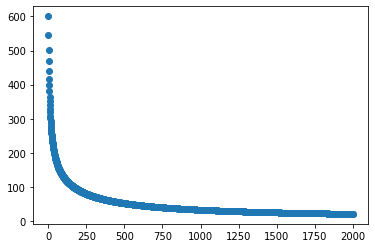

In [7]:
# X_train     contains information about the words within the training
#             messages. the ith row represents the ith training message. 
#             for a particular text, the entry in the jth column tells
#             you how many times the jth dictionary word appears in 
#             that message
#
# X_test      similar but for test set
#
# y_train     ith entry indicates whether message i is spam
#
# y_test      similar
#

m, n = X_train.shape

theta = np.zeros(n)


# YOUR CODE HERE: 
#  - learn theta by gradient descent 
#  - plot the cost history
#  - tune step size and # iterations if necessary
iterations = 2000
alpha = 1e-3
theta, costs = gradient_descent(X_train,y_train,theta,alpha,iterations)

plt.plot([i for i in range(iterations)], costs, marker='o', linestyle='none')
plt.show()


# Make predictions on test set
Use the model fit in the previous cell to make predictions on the test set and compute the accuracy (percentage of messages in the test set that are classified correctly). You should be able to get accuracy above 95%.


In [9]:
m_test, n_test = X_test.shape

# YOUR CODE HERE
#  - use theta to make predictions for test set
#  - print the accuracy on the test set---i.e., the precent of messages classified correctly
my_results = np.dot(X_test,theta)
accuracy = 0
for i in range(y_test.size):
  if my_results[i] < 0 and y_test[i] == 0 or my_results[i] > 0 and y_test[i] == 1:
    accuracy = accuracy + 1
percentage_correct = (accuracy / y_test.size) * 100
print("Percentage Correct: " + str(percentage_correct))

Percentage Correct: 96.5587044534413


# Inspect model parameters
Run this code to examine the model parameters you just learned. These parameters assign a postive or negative value to each word --- where positive values are words that tend to be spam and negative values are words that tend to be ham. Do they make sense?

In [10]:
token_weights = theta[1:]

def reverse(a):
    return a[::-1]

most_negative = np.argsort(token_weights)
most_positive = reverse(most_negative)

k = 10

print('Top %d spam words' % k)
for i in most_positive[0:k]:
    print('  %+.4f  %s' % (token_weights[i], tokens[i]))

print('\nTop %d ham words' % k)
for i in most_negative[0:k]:
    print('  %+.4f  %s' % (token_weights[i], tokens[i]))


Top 10 spam words
  +2.9638  __currency__
  +2.3588  text
  +2.2753  call
  +2.1736  txt
  +1.9629  reply
  +1.9369  service
  +1.8324  ringtone
  +1.7895  150p
  +1.7743  ringtoneking
  +1.7151  message

Top 10 ham words
  -1.4904  my
  -1.4637  so
  -1.3567  ok
  -1.2537  me
  -1.2075  later
  -1.1830  what
  -1.1535  ll
  -1.0650  come
  -1.0629  he
  -1.0145  waiting


## Make a prediction on new messages
Type a few of your own messages in below and make predictions. Are they ham or spam? Do the predictions make sense?

In [18]:
from IPython.utils.frame import extract_module_locals
def extract_features(msg):
    x = vectorizer.transform([msg]).toarray()
    x = np.insert(x, 0, 1)
    return x

msg = u'Write your own text here...'
x = extract_features(msg)  # this is the feature vector


# YOUR CODE HERE
#  - try a few texts of your own
#  - predict whether they are spam or non-spam
#Spam message
msg = u'ATTENTION! You are the 999th customer! Please send your social security number for a FREE iPhone!'
x = extract_features(msg)
print(np.dot(x,theta)) #Positive, so correctly predicts spam.
#Non spam message
msg = u'Can you call me?'
x = extract_features(msg)
print(np.dot(x,theta)) #Negative, so correctly predicts ham.
#Non spam message
msg = u'I uh forgot that sometimes naps need alarms'
x = extract_features(msg)
print(np.dot(x,theta)) #Negative, so correctly predicts ham.
#Spam message
msg = u'Welcome to our new # just for Red Cross Blood Donors!'
x = extract_features(msg)
print(np.dot(x,theta)) #Positive, so correctly predicts spam.


1.4980429103551671
-3.2413077164657205
-4.3629934399497765
0.26283936229563754


# <font color='red'>Problem 4</font>


# Hand-Written Digit Classification

In this assignment you will implement multi-class classification for
hand-written digits and run a few experiments. The file ``digits-py.mat``
is a data file containing the data set, which is split into a
training set with 4000 examples, and a test set with 1000 examples.

You can import the data as a Python dictionary like this:
``` .python
data = scipy.io.loadmat('digits-py.mat')
```

The code in the cell below first does some setup and then imports the data
into the following variables for training and test data:

* ``X_train`` - 2d array shape 4000 x 400
* ``y_train`` - 1d array shape 4000
* ``X_test`` - 2d array shape 1000 x 400
* ``y_test`` - 1d array shape 1000

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

# Load train and test data
import scipy.io
data = scipy.io.loadmat('digits-py.mat')
X_train = data['X_train']
y_train = data['y_train'].ravel()
X_test  = data['X_test']
y_test  = data['y_test'].ravel()

## (2 points) Write code to visualize the data

Once you have loaded the data, it is helpful to understand how it represents images. Each row of ``X_train`` and ``X_test`` represents a 20 x 20 image as a vector of length 400 containing the pixel intensity values. To see the original image, you can reshape one row of the train or test data into a 20 x 20 matrix and then visualize it using the matlplotlib ``imshow`` command. 

Write code using ``np.reshape`` and ``plt.imshow`` to display the 100th training example as an image. (Hint: use ``cmap='gray'`` in ``plt.imshow`` to view as a grayscale image.)

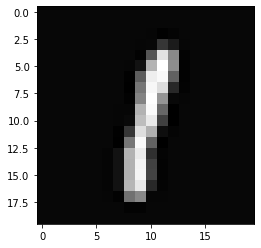

In [12]:
# Write code here
matr_form = np.reshape(X_train[99],(20,20)) #100th training example
plt.imshow(matr_form,cmap='gray')

## (2 points) Explore the data

A utility function ``display_data`` is provided for you to further visualize the data by showing a mosaic of many digits at the same time. For example, you can display the first 25 training examples like this:
``` .python
display_data( X_train[:25, :] )
```

Go ahead and do this to visualize the first 25 training examples. Then print the corresponding labels to see if they match.

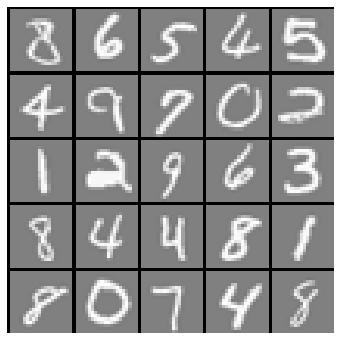

[8 6 5 4 5 4 9 7 0 2 1 2 9 6 3 8 4 4 8 1 8 0 7 4 8]


In [4]:
from one_vs_all import display_data #Had to change dashes to underscores to match file name
#Write code here
display_data( X_train[:25, :] )
#Print corresponding labels
print(y_train[:25]) #It matches

## Alert: notation change!

Please read this carefully to understand the notation used in the assignment. We will use logistic regression to solve multi-class classification. For three reasons (ease of displaying parameters as images, compatibility with scikit learn, previewing notation for SVMs and neural networks), we will change the notation as described here.

### Old notation
Previously we defined our model as
$$
h_{\boldsymbol{\theta}}(\mathbf{x}) = \text{logistic}(\theta_0 + \theta_1 x_1 + \ldots + \theta_n x_n)  = \text{logistic}(\boldsymbol{\theta}^T \mathbf{x})
$$
where 

* $\mathbf{x} = \begin{bmatrix}1, x_1, \ldots, x_n\end{bmatrix}$ was a feature vector with a 1 added in the first position
* $\boldsymbol{\theta} = \begin{bmatrix}\theta_0, \theta_1, \ldots, \theta_n\end{bmatrix}$ was a parameter vector with the intercept parameter $\theta_0$ in the first position

### New notation

We will now define our model as
$$
h_{\mathbf{w}}(\mathbf{x}) = \text{logistic}(b + w_1 x_1 + \ldots + w_n x_n)  = \text{logistic}(\mathbf{w}^T \mathbf{x} + b)
$$
where 

* $\mathbf{x} \in \mathbb{R}^n$ is the **original feature vector** with no 1 added
* $\mathbf{w} \in \mathbb{R}^n$ is a **weight vector** (equivalent to $\theta_1, \ldots, \theta_n$ in the old notation)
* $b$ is a scalar **intercept parameter** (equivalent to $\theta_0$ in our old notation)

## (10 points) One-vs-All Logistic Regression

Now you will implement one vs. all multi-class classification using logistic regression. Recall the method presented in class. Suppose we are solving a $K$ class problem given training examples in the data matrix $X \in \mathbb{R}^{m \times n}$ and label vector
$\mathbf{y} \in \mathbb{R}^{m}$ (the entries of $\mathbf{y}$ can be from $1$ to
$K$). 

**For each class $c = 1,\ldots,K$**, fit a logistic regression model
to distinguish class $c$ from the others using the
labels

$$
y_c^{(i)} = 
\begin{cases}
1 & \text{if } y^{(i)} = c \\
0 & \text{otherwise}.
\end{cases}
$$

This training
procedure  will result in a weight vector $\mathbf{w}_c$ and an intercept parameter $b_c$
that can be used to predict the probability that a new example $\mathbf{x}$ belongs to class $c$:

$$
\text{logistic}(\mathbf{w}_c^T \mathbf{x} + b_c) = \text{probability that $\mathbf{x}$
  belongs to class $c$}.
$$

The overall training procedure will yield one weight vector for each
class. To make the final prediction for a new example, select the
class with highest predicted probability:

$$
\text{predicted class} = \text{the value of $c$ that maximizes } \text{logistic}(\mathbf{w}_c^T \mathbf{x} + b_c).
$$

### Training ###

Open the file ``one_vs_all.py`` and complete the function ``train_one_vs_all`` 
to train binary classifiers using the procedure outlined 
above. I have included a function for training a regularized logistic regression 
model, which you can call like this:

``` .python
weight_vector, intercept = fit_logistic_regression(X, y, lambda_val)
```

Follow the instructions in the file for more details. Once you are done, test your implementation by running the code below to train the model and display the weight 
vectors as images. You should see images that are recognizable as the digits 0 through 9 (some are only vague impressions of the digit).

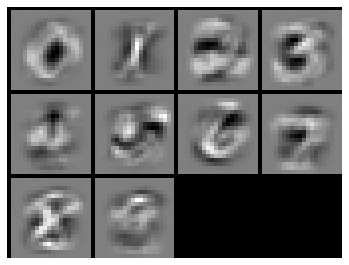

In [17]:
from one_vs_all import train_one_vs_all

lambda_val = 100 #100
weight_vectors, intercepts = train_one_vs_all(X_train, y_train, 10, lambda_val)
display_data(weight_vectors.T) # display weight vectors as images

### Predictions

Now complete the function ``predict_one_vs_all`` in ``one_vs_all.py`` and run the code below to make predictions on the train and test sets. You should see accuracy around 88% on the test set.

In [19]:
from one_vs_all import predict_one_vs_all

pred_train = predict_one_vs_all(X_train, weight_vectors, intercepts)
pred_test  = predict_one_vs_all(X_test,  weight_vectors, intercepts)

print("Training Set Accuracy: %f" % (np.mean(pred_train == y_train) * 100))
print("    Test Set Accuracy: %f" % (np.mean( pred_test == y_test) * 100))


Training Set Accuracy: 89.275000
    Test Set Accuracy: 88.300000


## (5 points) Regularization Experiment

Now you will experiment with different values of the regularization 
parameter $\lambda$ to control overfitting. Write code to measure the training 
and test accuracy for values of $\lambda$ that are powers of 10 ranging from 
$10^{-3}$ to $10^5$.

* Display the weight vectors for each value of $\lambda$ as an image using the ``display_data`` function
* Save the training and test accuracy for each value of $\lambda$
* Plot training and test accuracy versus lambda (in one plot). 

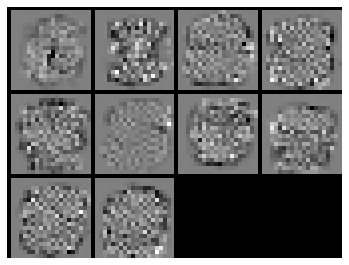

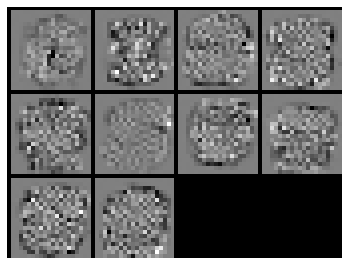

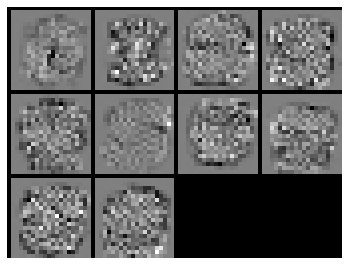

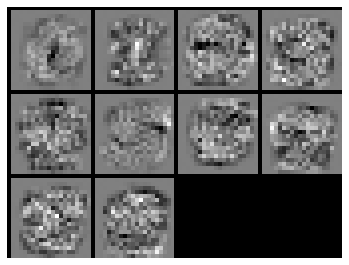

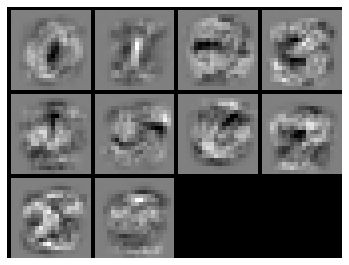

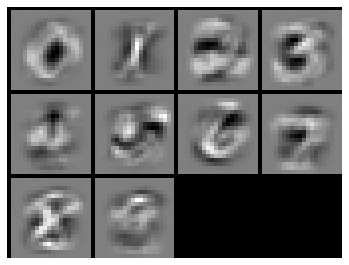

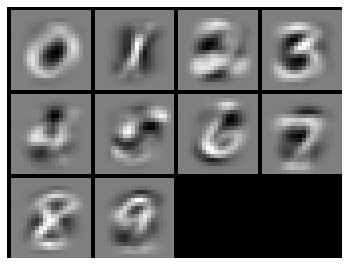

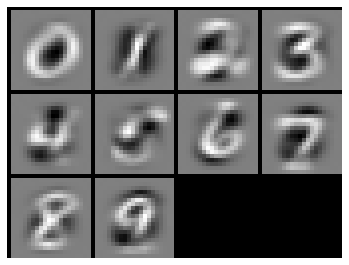

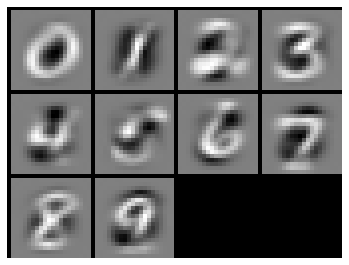

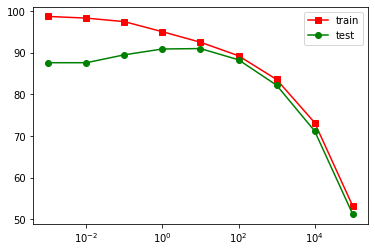

In [20]:
lambda_vals = 10**np.arange(-3., 6.) #Second arg changed to 6 to include 1e5
num_classes = 10
#print(lambda_vals)
training_accuracy = []
test_accuracy = []

# Write code here
for lambda_val in lambda_vals:
  #Calculate weight vectors and intercepts and display the weight vectors
  weight_vectors, intercepts = train_one_vs_all(X_train, y_train, num_classes, lambda_val)
  display_data(weight_vectors.T)
  #Calculate the training and test accuracy 
  pred_train = predict_one_vs_all(X_train, weight_vectors, intercepts)
  pred_test  = predict_one_vs_all(X_test,  weight_vectors, intercepts)
  #Save the training and test accuracy
  training_accuracy.append(np.mean(pred_train == y_train) * 100)
  test_accuracy.append(np.mean(pred_test == y_test) * 100)

# In your final plot, use these commands to provide a legend and set 
# the horizontal axis to have a logarithmic scale so the value of lambda 
# appear evenly spaced.

#plt.legend(('train', 'test'))
plt.xscale('log')

plt.plot(lambda_vals,training_accuracy,'rs-',label = 'train')
plt.plot(lambda_vals,test_accuracy,'go-',label='test')
plt.legend()
plt.show()

## (5 points) Regularization Questions 

1. Does the plot show any evidence of overfitting? If so, for what range of λ values (roughly) is the model overfit? What do the images of the weight vectors look when the model is overfit? 

2. Does the plot show any evidence of underfitting? For what range of λ values (roughly) is the model underfit? What do the images of the weight vectors look like when the model is underfit?

3. If you had to choose one value of λ, what would you select?

4. Would it make sense to run any additional experiments to look for a better value of λ. If so, what values would you try? 

** *Your answers here* **

1) The plot shows evidence of overfitting for lambdas smaller than 10, since test accuracy decreases from its peak at lambda = 10 when lambda decreases from that point, while training accuracy increases. The images of the weight vectors look extremely blurry and fuzzy, like hundreds of dots, when the model is overfit.
2) The plot shows evidence of underfitting for lambdas larger than 10, since both test and training accuracy decrease as lambda increases from 10. The images of the weight vectors look very sharp and clearly defined when the model is underfit.
3) I would choose lambda = 10 to minimize test error.
4) It would make sense to run more experiments to try and find the precise peak of test accuracy between lambda = 1 and lambda = 100. I would try more values between 1 and 100, say 1 through 10 (1, 2, 3...10) and each multiple of 10 (10, 20, 30, etc), until I zero in on the best lambda value.

## (6 points) Learning Curve

A learning curve shows accuracy on the vertical axis vs. the amount 
of training data used to learn the model on the horizontal axis. To 
produce a learning curve, train a sequence of models using subsets 
of the available training data, starting with only a small fraction 
of the data and increasing the amount until all of the training data
is used. 

Write code below to train models on training sets of increasing size
and then plot both training and test accuracy vs. the amount of training data used.
(This time, you do not need to display the weight vectors as images and you 
will not set the horizontal axis to have log-scale.) 

#### In this problem, please use the best value of $\lambda$ you have found. 

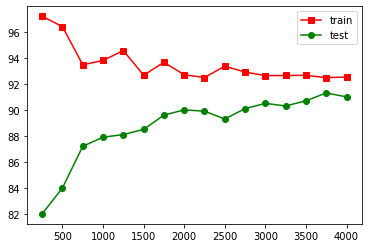

In [21]:
m, n = X_train.shape
#Note - middle arg changed to 4250 so as to include the full set in train_sizes
train_sizes = np.arange(250, 4250, 250) #4000 originally
nvals = len(train_sizes)

# Example: select a subset of 100 training examples
p = np.random.permutation(m)
selected_examples = p[0:100]
X_train_small = X_train[selected_examples,:]
y_train_small = y_train[selected_examples]

# Write your code here
#print(train_sizes)
#Set lambda_val to 10
lambda_val = 10
#Instantiate storage lists for training and testing accuracy
training_accuracy = []
test_accuracy = []
#Loop through every size in the training size vector
for train_size in train_sizes:
  #Create a permutation of size train_size
  p = np.random.permutation(m)
  selected_examples = p[0:train_size]
  X_train_small = X_train[selected_examples,:]
  y_train_small = y_train[selected_examples]
  #Train the model
  weight_vectors, intercepts = train_one_vs_all(X_train_small, y_train_small, num_classes, lambda_val)
  #Find the accuracy for both training and testing values
  pred_train = predict_one_vs_all(X_train_small, weight_vectors, intercepts)
  pred_test  = predict_one_vs_all(X_test,  weight_vectors, intercepts)
  #Store the accuracy for both testing and training values
  training_accuracy.append(np.mean(pred_train == y_train_small) * 100)
  test_accuracy.append(np.mean(pred_test == y_test) * 100)

#Plot training and testing accuracy vs amount of data used
plt.plot(train_sizes,training_accuracy,'rs-',label = 'train')
plt.plot(train_sizes,test_accuracy,'go-',label='test')
plt.legend()
plt.show()

# (4 points) Learning Curve Questions

1. Does the learning curve show evidence that additional training data might improve performance on the test set? Why or why not?

2. Is the any relationship between the amount of training data used and the propensity of the model to overfit? Explain what you can conclude from the plot.

** *Your answers here* **
1) It shows some evidence that more training data might improve performance, but not much, since testing and training accuracy are clearly converging by n = 4000 data points, so there's not much room for improvement.
2) More data means lower propensity to overfit. You can see that with lower data, training error is low and testing error is high, as we'd expect from overfitting, but this goes away as data increases.